In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data2= data[['v1','v2']]

#DATA CLEANING

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data2.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [9]:
texts =[]
for i in range(0, len(data2)):
  text_clean = re.sub('[^a-zA-Z]',' ',data2['v2'][i]) # used to keeping only alphabatic texts
  text_clean = text_clean.lower() 
  text_clean = text_clean.split()

  text_clean = [ps.stem(word) for word in text_clean if not word in stopwords.words('english')] #here we first take only those words which are not in stop words. after that we will apply the stemming on
  text_clean = ' '.join(text_clean)
  texts.append(text_clean)

In [10]:
texts

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [11]:
texts

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

#TF-IDF Model
with the help of tfidfvectorizer we will convert our text data into the numeric vector form

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,min_df=1) # we will only get max 5000 words columns which are more frequent
X = tfidf.fit_transform(texts).toarray()

In [13]:
X=pd.DataFrame(X,columns= tfidf.get_feature_names_out()) #converted our array matrix into dataframe to see it in better way.

In [14]:
X 

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zebra,zed,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X.shape

(5572, 5000)

In [16]:
#converting output object column into numerical

In [17]:
dic = {'ham':1,'spam':0}

In [18]:
y = data2['v1'].map(dic)

In [19]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: int64

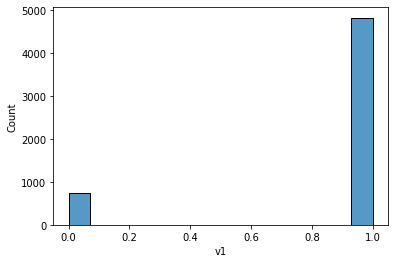

In [20]:
sns.histplot(y)
plt.show()


data is inbalanced

In [21]:
new_data = pd.DataFrame(texts,columns = ['text'])
new_data['detect']= y

In [22]:
new_data

,text,detect
0,go jurong point crazi avail bugi n great world...,1
1,ok lar joke wif u oni,1
2,free entri wkli comp win fa cup final tkt st m...,0
3,u dun say earli hor u c alreadi say,1
4,nah think goe usf live around though,1
...,...,...
5567,nd time tri contact u u pound prize claim easi...,0
5568,b go esplanad fr home,1
5569,piti mood suggest,1
5570,guy bitch act like interest buy someth els nex...,1


In [23]:
from wordcloud import WordCloud

#these are basically most repeated words in spam

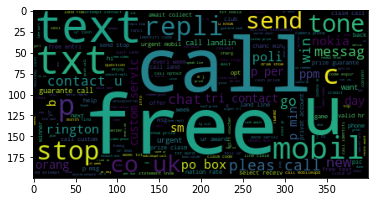

In [24]:
wc = WordCloud()
spam_wc = wc.generate(new_data[new_data['detect']==0]['text'].str.cat(sep=' '))
plt.imshow(spam_wc)
plt.show()

#these are basically most repeated words in ham

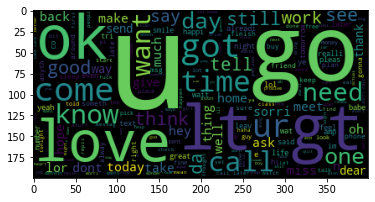

In [25]:
wc = WordCloud()
spam_wc = wc.generate(new_data[new_data['detect']==1]['text'].str.cat(sep=' '))
plt.imshow(spam_wc)
plt.show()


#Training and Testing

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,random_state=0)

#lets compare different Models to figure out the best Model for our data

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [28]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
rfc = RandomForestClassifier()
dtc =DecisionTreeClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
abc=AdaBoostClassifier()
nb= GaussianNB()

In [30]:
models = [rfc, dtc,lr, knn, abc, nb]
models_ = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','KNeighborsClassifier', 'AdaBoostClassifier', 'NaiveBayesClassifer']


In [31]:
acc =[]
pre=[]
rec=[]
for i in models:
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  acc.append(accuracy)
  pre.append(precision)
  rec.append(recall)


  

In [32]:
model_sel = pd.DataFrame()
model_sel['Models']= models_
model_sel['Accuracy']= acc
model_sel['Precision']= pre
model_sel['Recall']= rec





In [33]:
model_sel

,Models,Accuracy,Precision,Recall
0,RandomForestClassifier,0.974282,0.970887,1.000000
1,DecisionTreeClassifier,0.964115,0.978412,0.979777
2,LogisticRegression,0.954545,0.950863,0.998605
3,KNeighborsClassifier,0.906699,0.901887,1.000000
4,AdaBoostClassifier,0.970096,0.973973,0.991632
5,NaiveBayesClassifer,0.869019,0.972028,0.872385


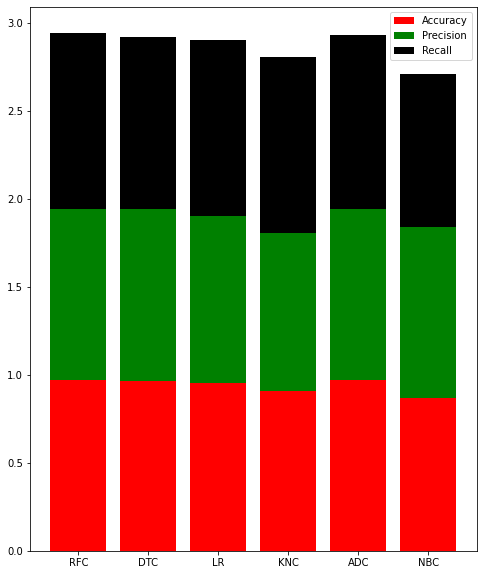

In [34]:
b = ['RFC','DTC','LR','KNC','ADC','NBC']
plt.figure(figsize=(8,10))
plt.bar(b,model_sel['Accuracy'], color = 'red')
plt.bar(b,model_sel['Precision'], bottom = model_sel['Accuracy'] , color = 'green')
plt.bar(b,model_sel['Recall'], bottom = model_sel['Accuracy'] + model_sel['Precision'], color = 'black')
plt.legend(['Accuracy','Precision','Recall'])
plt.show()



#as we can see we are getting best accuracy on Randomforest so we will consider is at our Model

In [35]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       238
           1       0.97      1.00      0.98      1434

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [37]:
confusion_matrix(y_test,y_pred)

array([[ 192,   46],
       [   1, 1433]])

#lets save our model

In [38]:
import joblib
joblib.dump(tfidf,"data_vectorizer.Pkl")

['data_vectorizer.Pkl']

In [39]:
joblib.dump(rfc,"Spam_detector")

['Spam_detector']